In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:

d = pd.read_csv("https://reneshbedre.github.io/myfiles/volcano/SaLR_DEGseq.txt", sep="\t")

In [4]:
d.head()

,GeneNames,value1,value2,log2FC,p-value
0,LOC_Os09g01000.1,8862,32767,-1.886539,1.250000e-55
1,LOC_Os12g42876.1,1099,117,3.231611,1.050000e-55
2,LOC_Os12g42884.2,797,88,3.179004,2.590000e-54
3,LOC_Os03g16920.1,274,7,5.290677,4.690000e-54
4,LOC_Os05g47540.4,308,18,4.096862,2.190000e-54


In [5]:
d.describe()

,value1,value2,log2FC,p-value
count,19025.000000,19025.000000,10638.000000,1.902500e+04
mean,7.772983,9.626439,-0.104592,5.320242e-01
std,71.025414,239.910629,1.245378,3.596714e-01
min,0.000000,0.000000,-8.134426,1.050000e-55
25%,0.000000,1.000000,-1.000000,1.995741e-01
50%,2.000000,2.000000,0.000000,4.715267e-01
75%,6.000000,7.000000,0.652077,1.000000e+00
max,8862.000000,32767.000000,5.592457,1.000000e+00


In [6]:
d.loc[(d['log2FC'] >= 1) & (d['p-value'] < 0.05), 'color'] = "green"  # upregulated
d.loc[(d['log2FC'] <=- 1) & (d['p-value'] < 0.05), 'color'] = "red"   # downregulated
d['color'].fillna('grey', inplace=True) # intermediate

In [7]:
d = d.loc[(d['value1'] >= 10) & (d['value2'] >= 10)]

In [8]:
d['logpv']=-(np.log10(d['p-value']))

In [9]:
d.describe()

,value1,value2,log2FC,p-value,logpv
count,2389.000000,2389.000000,2389.000000,2.389000e+03,2389.000000
mean,42.682294,54.421934,-0.029712,3.517010e-01,2.026185
std,196.472923,675.328590,0.811810,3.381400e-01,5.201935
min,10.000000,10.000000,-3.016302,1.050000e-55,-0.000000
25%,15.000000,15.000000,-0.494765,2.349459e-02,0.194393
50%,22.000000,23.000000,0.000000,2.402673e-01,0.619305
75%,37.000000,38.000000,0.440573,6.391566e-01,1.629032
max,8862.000000,32767.000000,4.096862,1.000000e+00,54.978811


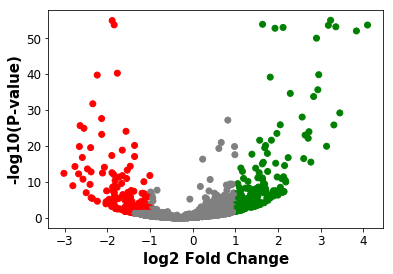

In [8]:
# plot 
plt.scatter(d['log2FC'], d['logpv'], c=d['color'])
plt.xlabel('log2 Fold Change',fontsize=15, fontname="sans-serif", fontweight="bold")
plt.ylabel('-log10(P-value)', fontsize=15, fontname="sans-serif", fontweight="bold")
plt.xticks(fontsize=12, fontname="sans-serif")
plt.yticks(fontsize=12, fontname="sans-serif")
plt.show()